In [ ]:
# :: 20th December 2022 :: @4:29pm

In [45]:
import numpy as np, librosa, matplotlib.pyplot as plt, librosa.display, IPython.display as ipd

Mel-Frequency Cepstral Coefficients (Audio Feature)
- Mel-Frequency referring to the Mel scale-
- Cepstral reffering to the noun Cepstrum -> Ceps -> Spectrum -> referring to a spectrum
    - Ceptral domain features are obtained by taking the inverse fourier transform of the log power spectrum
    - The advantage to this is that the features are less correlated.
- Coeffs referring to describing 

Other Research Terms
- Cepstrum -> Spectrum
- Quefrency -> Frequency
- Liftering -> Filtering
- Rhamonic -> Harmonic

Historial Notes on Cepstrum
- Developed while studying echoes in seismic signals (1960s MIT?)
- Audio feature of choice for speech recogniiton and identificaiton (1970s)
- Relevant in music processing (2000s)
    - Taken recognition as MFCC feature

Computing the Cepstrum:
$$
C(x(t)) = F^{-1}[\log(F[x(t)])]
$$
- where $x(t)$ is the time-domain signal
- where F[] = discrete fourier transform giving us a spectrum
- Logarithm is applied to the spectrum with log(), applying a logarithm on the amplitude spectrum
- We then inverse it with an inverse fourier transform as F^{-1}, the key cepstrum step. (applied to log amplitude spectrum)

In [46]:
windchime_path = '../stereo_denoised_windchime.flac'

windchime_audio, windchime_sr = librosa.load(windchime_path)

In [47]:
windchime_single_sample_duration = 1 / windchime_sr

windchime_duration = windchime_single_sample_duration * len(windchime_audio)

print(f'Duration of signal: {windchime_duration:.2f} seconds, and of a single sample: {windchime_single_sample_duration:.6f}')

Duration of signal: 292.44 seconds, and of a single sample: 0.000045


Text(0.5, 1.0, 'Windchime Signal')

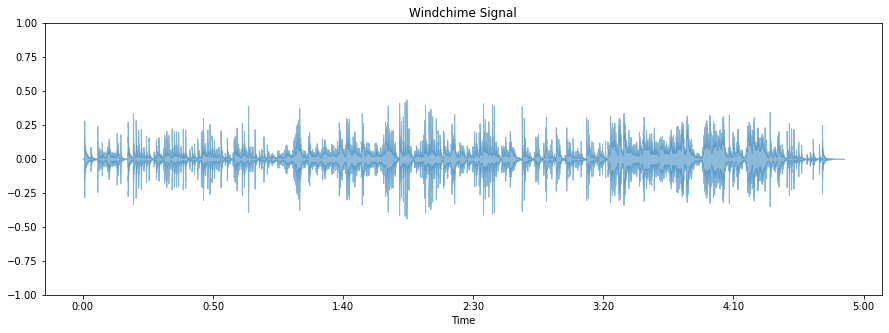

In [48]:
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveshow(windchime_audio, alpha=0.5)
plt.ylim(-1, 1)
plt.title('Windchime Signal')

In [66]:
import scipy as sp

dft = sp.fft.fft(windchime_audio)

magnitude = np.absolute(dft)
frequency = np.linspace(0, windchime_sr, len(magnitude))

Text(0, 0.5, 'Power')

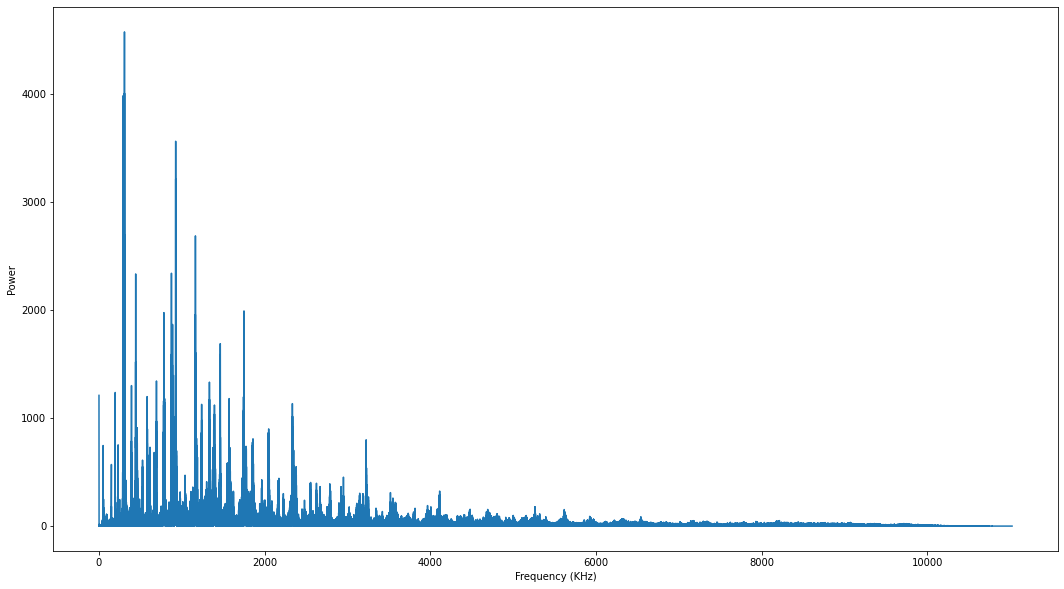

In [67]:
num_frequency_bins = int(len(magnitude) * 0.5)

plt.figure(figsize=(18, 10))
plt.plot(frequency[0:num_frequency_bins
                   ], magnitude[0:num_frequency_bins])
plt.xlabel('Frequency (KHz)')
plt.ylabel('Power')

In [ ]:
# insert log power spectrum here:

Time domain -> Freq domain (DFT) -> Apply inverse DFT (we go back to time domain (someting like it)) -> they called it the quefrency (ms)

The peaks represent the quefrency peaks in the cepstrum as rhamonics.

Speech:
The vocal tract:
- In terms of DSP, the vocal tract is a kind of filter

Speech generation:
- Glottal Pulses:
    - This is the signal that gets generated by the vocal falls, this signal passes through the vocal tract which acts as a filter to the glottal pusles and creates speech signal.
- The glottal pulse carries information of the pitch meanwhile the FR response provided by the filter will carry timbre information fo the speech such as consonants and vowels and phonomenes. 

Understanding the Cepstrum
- Start with a log-amplitude spectrum of say speech
- We can try to smoothen the signal, take the envelope, the spectral envelope of it.
- Peaks in the spectral envelope are called 'Formants'
- Formants = carry identify of the sound (the timbre) / the phonemes we have in speech.

Spectral Envelope:
- Very similar to the vocal tract's frequency response, the impulse response on the shape of the vocal tract.
- If you subtract the log-spectrum and spectral envelope you get the spectral detail
  - This maps really nicely into the glottal pulse.

Spectral detail
- Matches really nicely onto the glottal pulse.


To smoothen the log-spectrum of speech we can smooth the signal with a spectral envelope:
- Use a spectral envelope which outlines the amplitude peaks roughly of the log-spectrum speech signal.
    - Is is useful as we perceive speech and sound with peaks (Formants (carry identity of sound.))

Speech = Can be interpreted as convolution of vocal tract frequency response with glottal pulse.

Formalized Speech:
Time Domain:
$$
x(t) = e(t) \times h(t)
$$
where e = glottal pulse and h = vocal tract FR
Frequency Domain:
$$
X(t) = E(freq) \times H(freq)
where X(freq) = spectrum of speech
$$
We can take the log to both sides:
$$
log(X(freq)) = log(E(freq) \times H(freq))
$$
$$
log(X(freq)) = log(E(freq) + H(freq))
$$
where X(freq) = speech, log(e(freq)) = vocal tract frequency response and log(H(t)) = glottal pulse

The Goal is to separate the initial speech signal into two components:
- Vocal tract FR 
    - Carries the important components in speech signal.
- Glottal pulse 
    - We are not too interested in this as pitch is not too important rather identify of the sound (phonemes and identify of the sound)

Getting these components
- We can use the Cepstrum of this by doing an inverse fourier transform on the log-spectrum
- If we see 4 major peaks in the FR we can assume we would use a sinusoid of 4hz, meaning when moving to the quefrency domain we get a high value peak at 4hz.
- All the low frequency indicate the low frequency moving signals.
- The glottal pulse frequency can then be assumed by 100hz on the quefrency axis by the peaks.
- A natural separation is present in the Cepstrum as the formants are present on the left and the glottal pulse pitch information on the right side.
- $X(freq) = E(freq) + H(freq)$, are present in the Cepstrum.
Low Pass Filter:
- Since we don't need the Glottal pulse component we can perform a low pass filter to remove the right side quefrency which carries the glottal pulse component. Thus:
    - $X(freq) = H(freq)$

MFCC's:
- 1) Begin in the waveform (time domain)
- 2) Apply DFT to get a spectrum
- 3) Apply a log-amplitude spectrum to get a log-spectrum
- 4) we apply MEL-SCALING (triangular filter bank (mel filter banks))
- 5) Applying the IDFT (Discrete cosine transform) (to get a number of MFCC coeffs)
- 6) we get MFCC's

- At each step we seem to have a perceptually informed processing method.
    - EG (log for DB volume (loudness))
    - mel based representation
    - DCT (we get information about values which construct formants for timbre and spectrum information for understanding phonemes and speech)

Why Bother with the Discrete Cosine Transform and not DFT?:
- It is a simplified version of a fourier transform
- Gives back real-values coefficients unlike DFT (normally complex numbers)
- Enables us to de-correlate energy in different mel bands
    - Helps in machine learning as we wants as dis-correlated features as possible
- Reduces the # of dimensions to represent spectrum.


How many MFCCs do we take?:
- Traditionally we take 12 to 13
- First coeffs keep the most information (formants, spectral envelope)
    - Higher coeffs provide information about fast spectral transients and details that aren't too important for speech.
- Use $\delta$ and $\delta\delta$ MFCC's
    - A bit like taking the first and second derivatives of the MFCCs
- Total 39 coeffs per frame

Visualising MFCC's
- Looks like a Spectrogram.
- Matrix like as Y = index of coeffs and Y = time (frames).

MFCC's Advantages:
- Describe the large structures of the spectrum (formants, phonemes)
- Ignore the fine spectral structures
- Work well in speech and music processing.

MFCC's Disadvantages:
- Not robust to noise (active noise)
- Extensive knowledge engineering is needed to come up with them
    - As the machine may not need these human perceptive information through our biasing.
- Not efficient for synthesis
    - Great for analysis (no inverse of MFCC to raw audio in a good manner)

MFCC Applications:
- Speech processing (Deep learning has been moving to data that is as real as possible)
    - Speech recognition

- Music Processing
    - Automatic tagging
    - Mood classifiers